In [1]:
import numpy as np
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ramanspy as rp
from scipy.signal import find_peaks
import seaborn as sns
from scipy.signal import savgol_filter
import sys

In [3]:
def find_peaks_and_shoulders(y, p=(0.00005, 0.00005)): # y is an array
    x = new_spectral_axis
    dy = np.diff(y)
    dx = np.diff(x)
    d = dy/dx
    smoothed = savgol_filter(d, window_length=30, polyorder=9)
    shoulders = find_peaks(-smoothed, prominence = p[0])[0]

    peaks_ = find_peaks(y, prominence = 0.001)[0]
    shoulders = find_peaks(-smoothed, prominence = p[1])[0]

    peaks_and_shoulders = np.sort(np.concatenate((peaks_,shoulders)))
    return (peaks_and_shoulders, d)

# importing data

In [7]:
def save_figure(directory, filename):
    """
    Saves the current matplotlib figure as a PNG file.
    
    Args:
        filename (str): The name of the file (with or without .png extension).
    """
    os.makedirs(directory, exist_ok=True)
    
    if not filename.lower().endswith('.png'):
        plt.savefig(os.path.join(directory, filename+".png"), dpi=600, bbox_inches='tight')
    else:
        plt.savefig(os.path.join(directory, filename), dpi=600, bbox_inches='tight')

    print(f"Figure saved as: {filename}")
    

    if not filename.lower().endswith('.svg'):
        plt.savefig(os.path.join(directory, filename+".svg"), dpi=600, bbox_inches='tight')
    else:
        plt.savefig(os.path.join(directory, filename), dpi=600, bbox_inches='tight')

    print(f"Figure saved as: {filename}")

In [176]:
folders = ("spectrums_salt_week2", "spectrums_salt_week4") # first one is week2 data and 2nd one isweek4 data. enter directory.

salt_or_dry = "salt" # write salt or dry


if salt_or_dry == "salt":
    spectrums={"week2": {"Control":[],"Salt50":[],"Salt100":[],"Salt150":[], "Salt200": []}, 
                "week4": {"Control":[],"Salt50":[],"Salt100":[],"Salt150":[], "Salt200": []}}
elif salt_or_dry == "dry":
    spectrums={"week2": {"Control":[],"20":[],"40":[],"60":[], "80":[]}, 
                "week4": {"Control":[],"20":[],"40":[],"60":[], "80":[]}} 

groups = spectrums["week2"].keys()

week_folders = [("week2", folders[0]),("week4",folders[1])]

for week, files in week_folders:
    for file_name in os.listdir(files):
        file_path = os.path.join(files, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                print(file_name)
                spect = np.load(f"{files}/{file_name}",allow_pickle='TRUE')
                spect = spect.reshape(spect.shape[0]*spect.shape[1],1140)

    
                for group in groups:
                    if group in file_name:
                        spectrums[week][group].extend(spect)

for week in spectrums:
    for group in spectrums[week]:
        spectrums[week][group] = np.array(spectrums[week][group] )
#spectrums
         

spectrumsR-T_Wheat_2ndW_Control_1_2.npy
spectrumsR-T_Wheat_Salt100_2_2.npy
spectrumsR-T_Wheat_2ndW_Control_1_1.npy
spectrumsR-T_Wheat_Salt100_2_1.npy
spectrumsR-T_Wheat_Salt50_2_2.npy
spectrumsR-T_Wheat_Salt100_1_2.npy
spectrumsR-T_Wheat_2ndW_Control_2_2.npy
spectrumsR-T_Wheat_Salt100_1_1.npy
spectrumsR-T_Wheat_2ndW_Control_2_1.npy
spectrumsR-T_Wheat_2ndW_Salt50_2_1.npy
spectrumsR-T_Wheat_Salt150_1_1.npy
spectrumsR-T_Wheat_Salt200_1_2.npy
spectrumsR-T_Wheat_Salt150_1_2.npy
spectrumsR-T_Wheat_Salt200_1_1.npy
spectrumsR-T_Wheat_2ndW_Salt50_1_2.npy
spectrumsR-T_Wheat_2ndW_Salt50_1_1.npy
spectrumsR-T_Wheat_Salt200_2_2.npy
spectrumsR-T_Wheat_Salt150_2_1.npy
spectrumsR-T_Wheat_Salt200_2_1.npy
spectrumsR-T_Wheat_Salt150_2_2.npy
spectrumsR-T_Wheat_Salt50_1_2.npy
spectrumsR-T_Wheat_Salt50_1_1.npy
spectrumsR-T_Wheat_Control_2_2.npy
spectrumsR-T_Wheat_Salt100_2_2.npy
spectrumsR-T_Wheat_Control_2_1.npy
spectrumsR-T_Wheat_Salt100_2_1.npy
spectrumsR-T_Wheat_Salt50_2_2.npy
spectrumsR-T_Wheat_Salt50_2

In [178]:
print(len(spectrums["week2"]["Control"]))

780


# preprocessing and creating pandas dataframes

In [181]:
new_spectral_axis = np.arange(660,1800)

In [183]:
# take transpose of spectrums
spectrums_Transposed = {"week2": {"Control":[],"Salt50":[],"Salt100":[],"Salt150":[], "Salt200": []}, 
                "week4": {"Control":[],"Salt50":[],"Salt100":[],"Salt150":[], "Salt200": []}}
for week in spectrums.keys():
    spectrums_Transposed[week] = {k: np.array(v).T for k, v in spectrums[week].items()}


In [185]:
print(spectrums_Transposed["week2"]["Control"].shape)
spectrums["week2"]["Control"].shape


(1140, 780)


(780, 1140)

In [187]:
#aynı grubun spektrumlarının ortalamsını bul
total_spect_per_group = {"week2": {}, "week4": {}}
total_peaks = {"week2": {}, "week4" : {}}
    
for week in spectrums.keys():
    for group in spectrums[week]:
        y=np.zeros(len(new_spectral_axis))
        print(len(spectrums[week][group]))
        for i in range(len(spectrums[week][group])):
            y = y + spectrums[week][group][i]
        #find avg
        print(len(y))
        total_spect_per_group[week][group] = y/len(spectrums[week][group])
        
        print(len(total_spect_per_group[week][group]))
        peaks, _ = find_peaks(total_spect_per_group[week][group])
        total_peaks[week][group] = peaks + 660
        print(total_peaks[week][group])



780
1140
1140
[ 736  819  868  948  986  996 1027 1058 1070 1104 1248 1284 1322 1373
 1409 1438 1493 1505 1562 1577 1636 1672 1689 1724 1787]
945
1140
1140
[ 736  819  865  948  986  996 1027 1057 1064 1071 1104 1248 1286 1322
 1372 1412 1438 1505 1562 1577 1637 1674 1689 1700 1724 1787]
924
1140
1140
[ 736  819  840  865  948  986  996 1020 1064 1070 1104 1245 1286 1322
 1357 1372 1411 1438 1505 1517 1577 1604 1637 1672 1689 1701 1724 1764
 1787]
1000
1140
1140
[ 736  819  840  865  948  986  996 1020 1051 1064 1070 1104 1226 1246
 1267 1284 1322 1372 1413 1438 1490 1505 1517 1577 1604 1637 1672 1689
 1701 1724 1761 1788]
915
1140
1140
[ 739  819  865  948  986 1027 1051 1064 1070 1107 1187 1225 1248 1267
 1283 1322 1372 1413 1438 1490 1520 1577 1610 1622 1639 1672 1689 1701
 1724 1764 1789]
914
1140
1140
[ 737  819  840  865  945  996 1057 1064 1104 1248 1284 1322 1372 1437
 1505 1583 1637 1672 1689 1695 1700 1724 1761 1781 1789]
876
1140
1140
[ 739  822  865  948  996 1057 1063 1077

In [189]:
#create data that contains group and week information

data_all = []
long_data = []
peaks_all = []
df_spectrums = []

dummy = [f"wavenumber_{i+1}" for i in range(1140)]
cols = ["group", "week"]
cols = cols + dummy

for group in total_spect_per_group["week2"]:
    data_all.append([group, "week2", total_spect_per_group["week2"][group]])
    peaks_all.append([group, "week2", total_peaks["week2"][group]])
    
    data_all.append([group, "week4", total_spect_per_group["week4"][group]])
    peaks_all.append([group, "week4", total_peaks["week4"][group]])

    dummy_2 = [group, "week2"]
    for j in range(1140):
        dummy_2.append(spectrums_Transposed["week2"][group][j])
    dummy_4 = [group, "week4"]
    for j in range(1140):
        dummy_4.append(spectrums_Transposed["week4"][group][j])
    df_spectrums.append(dummy_2)
    df_spectrums.append(dummy_4)
    

    for val in total_spect_per_group["week2"][group]:
        long_data.append({"group": group, "week": "week2", "intensity": val})

    for val in total_spect_per_group["week4"][group]:
        long_data.append({"group": group, "week": "week4", "intensity": val})
    



    

df_data = pd.DataFrame(data_all, columns=["group", "week", "spectra"])
df_long = pd.DataFrame(long_data)
df_peaks = pd.DataFrame(peaks_all, columns=["group", "week", "peaks"])


df_spectrums = pd.DataFrame(df_spectrums, columns = cols)


In [191]:
df_spectrums

,group,week,wavenumber_1,wavenumber_2,wavenumber_3,wavenumber_4,wavenumber_5,wavenumber_6,wavenumber_7,wavenumber_8,...,wavenumber_1131,wavenumber_1132,wavenumber_1133,wavenumber_1134,wavenumber_1135,wavenumber_1136,wavenumber_1137,wavenumber_1138,wavenumber_1139,wavenumber_1140
0,Control,week2,"[0.028431018876942687, 0.0006114368161985593, ...","[0.028431018876942687, 0.0006114368161985593, ...","[0.028431018876942687, 0.0006114368161985593, ...","[0.029317456232136514, 0.0006114368161985593, ...","[0.030282767830093524, 0.0010135509534007102, ...","[0.031248079428050538, 0.0015806398964665945, ...","[0.03204158190043926, 0.002147728839532479, 0....","[0.03231530624743338, 0.0027490389176875163, 0...",...,"[0.05348415091971127, 0.020058885803126526, 0....","[0.05513564030806747, 0.019958873331917145, 0....","[0.052658602515623855, 0.019858860860707764, 0...","[0.049470640484453224, 0.019604662011220204, 0...","[0.04632884215124858, 0.01926518936795198, 0.0...","[0.04520218224351528, 0.018925716724683756, 0....","[0.044075522335781984, 0.018699475075213925, 0...","[0.042807872114425875, 0.018499245616830303, 0...","[0.04095327497100513, 0.01829901615844668, 0.0...","[0.039098677827584374, 0.018295908211301497, 0..."
1,Control,week4,"[0.10994222099815552, 0.0027940976520140436, 0...","[0.10994222099815552, 0.0027940976520140436, 0...","[0.10994222099815552, 0.0027940976520140436, 0...","[0.10960238954058311, 0.0027940976520140436, 0...","[0.10911734977600869, 0.0031622038071093535, 0...","[0.10863231001143425, 0.003641606445624994, 0....","[0.1080472938467608, 0.004121009084140634, 0.0...","[0.10431223797198144, 0.004701813866156491, 0....",...,"[0.02267501417180323, 0.01742882906572731, 0.0...","[0.02343835708878492, 0.01761115249518491, 0.0...","[0.021790350887480905, 0.01779347592464251, 0....","[0.01875887967063153, 0.017850599145800315, 0....","[0.015727408453782152, 0.01785473972642872, 0....","[0.017788447604219285, 0.01785888030705713, 0....","[0.021085199021783796, 0.017838572231550907, 0...","[0.024381950439348304, 0.017814673670988972, 0...","[0.02154986695640883, 0.017791808405350072, 0....","[0.018567198390835912, 0.017791808405350072, 0..."
2,Salt50,week2,"[0.0031087534679806682, 0.0006736279727688169,...","[0.0031087534679806682, 0.0006736279727688169,...","[0.0031087534679806682, 0.0006736279727688169,...","[0.0028214024799777405, 0.0006736279727688169,...","[0.00248992976564562, 0.0010051704906675846, 0...","[0.0021584570513134994, 0.0014733486164370722,...","[0.0020472069871014602, 0.0019415267422065595,...","[0.0028334587373131065, 0.0024363256000876255,...",...,"[0.015080578342906966, 0.019120542435274862, 0...","[0.013869350011211118, 0.01893555342702189, 0....","[0.013386568109978597, 0.01875056441876892, 0....","[0.013083968582081723, 0.01859517093653092, 0....","[0.012781369054184848, 0.01845621194730563, 0....","[0.01515620362230477, 0.01831725295808034, 0.0...","[0.017611014623985146, 0.018242236564886636, 0...","[0.019811130785451773, 0.01818199954029094, 0....","[0.02047591039457865, 0.01812176251569525, 0.0...","[0.021140690003705526, 0.018120771492973618, 0..."
3,Salt50,week4,"[0.011445212453653259, 0.0039020138546694335, ...","[0.011445212453653259, 0.0039020138546694335, ...","[0.011445212453653259, 0.0039020138546694335, ...","[0.01240670766731549, 0.0039020138546694335, 0...","[0.013788308788509182, 0.004214286460882922, 0...","[0.015169909909702874, 0.0046144725796966, 0.0...","[0.01660825867797854, 0.005014658698510277, 0....","[0.0201670967348499, 0.005511528439792638, 0.0...",...,"[0.041000402849390015, 0.019127171567390668, 0...","[0.04088853348196303, 0.019193525287401474, 0....","[0.03939281014770496, 0.01925987900741228, 0.0...","[0.03708690682816913, 0.019049453108169852, 0....","[0.034781003508633314, 0.018728770234897003, 0...","[0.03323805131247142, 0.01840808736162415, 0.0...","[0.03188579849804827, 0.01831336262496041, 0.0...","[0.030533545683625124, 0.018248166417693074, 0...","[

In [193]:
df_long

,group,week,intensity
0,Control,week2,0.000617
1,Control,week2,0.000617
2,Control,week2,0.000617
3,Control,week2,0.000619
4,Control,week2,0.000828
...,...,...,...
11395,Salt200,week4,0.022859
11396,Salt200,week4,0.022703
11397,Salt200,week4,0.022549
11398,Salt200,week4,0.022400


In [195]:
df_data

,group,week,spectra
0,Control,week2,"[0.0006174643479924185, 0.0006174643479924185,..."
1,Control,week4,"[0.0036312918309959557, 0.0036312918309959557,..."
2,Salt50,week2,"[0.0010535443952895101, 0.0010535443952895101,..."
3,Salt50,week4,"[0.0035727310170915218, 0.0035727310170915218,..."
4,Salt100,week2,"[0.001170660225398259, 0.001170660225398259, 0..."
5,Salt100,week4,"[0.0031190922448620434, 0.0031190922448620434,..."
6,Salt150,week2,"[0.0015978354347541573, 0.0015978354347541573,..."
7,Salt150,week4,"[0.002923961391873131, 0.002923961391873131, 0..."
8,Salt200,week2,"[0.0017257691380878628, 0.0017257691380878628,..."
9,Salt200,week4,"[0.004152977802025394, 0.004152977802025394, 0..."


In [197]:
df_cropped = df_data.copy()

In [198]:
df_cropped

,group,week,spectra
0,Control,week2,"[0.0006174643479924185, 0.0006174643479924185,..."
1,Control,week4,"[0.0036312918309959557, 0.0036312918309959557,..."
2,Salt50,week2,"[0.0010535443952895101, 0.0010535443952895101,..."
3,Salt50,week4,"[0.0035727310170915218, 0.0035727310170915218,..."
4,Salt100,week2,"[0.001170660225398259, 0.001170660225398259, 0..."
5,Salt100,week4,"[0.0031190922448620434, 0.0031190922448620434,..."
6,Salt150,week2,"[0.0015978354347541573, 0.0015978354347541573,..."
7,Salt150,week4,"[0.002923961391873131, 0.002923961391873131, 0..."
8,Salt200,week2,"[0.0017257691380878628, 0.0017257691380878628,..."
9,Salt200,week4,"[0.004152977802025394, 0.004152977802025394, 0..."


In [201]:
len(df_data["spectra"][0])

1140

In [202]:
#df_cropped["spectra"] = df_data["spectra"].apply(lambda x: x[20:40])

<h1> spectrum plots

<h2> comparison of spectrums of same group different week

Control week2
Control week4
Salt50 week2
Salt50 week4
Salt100 week2
Salt100 week4
Salt150 week2
Salt150 week4
Salt200 week2
Salt200 week4


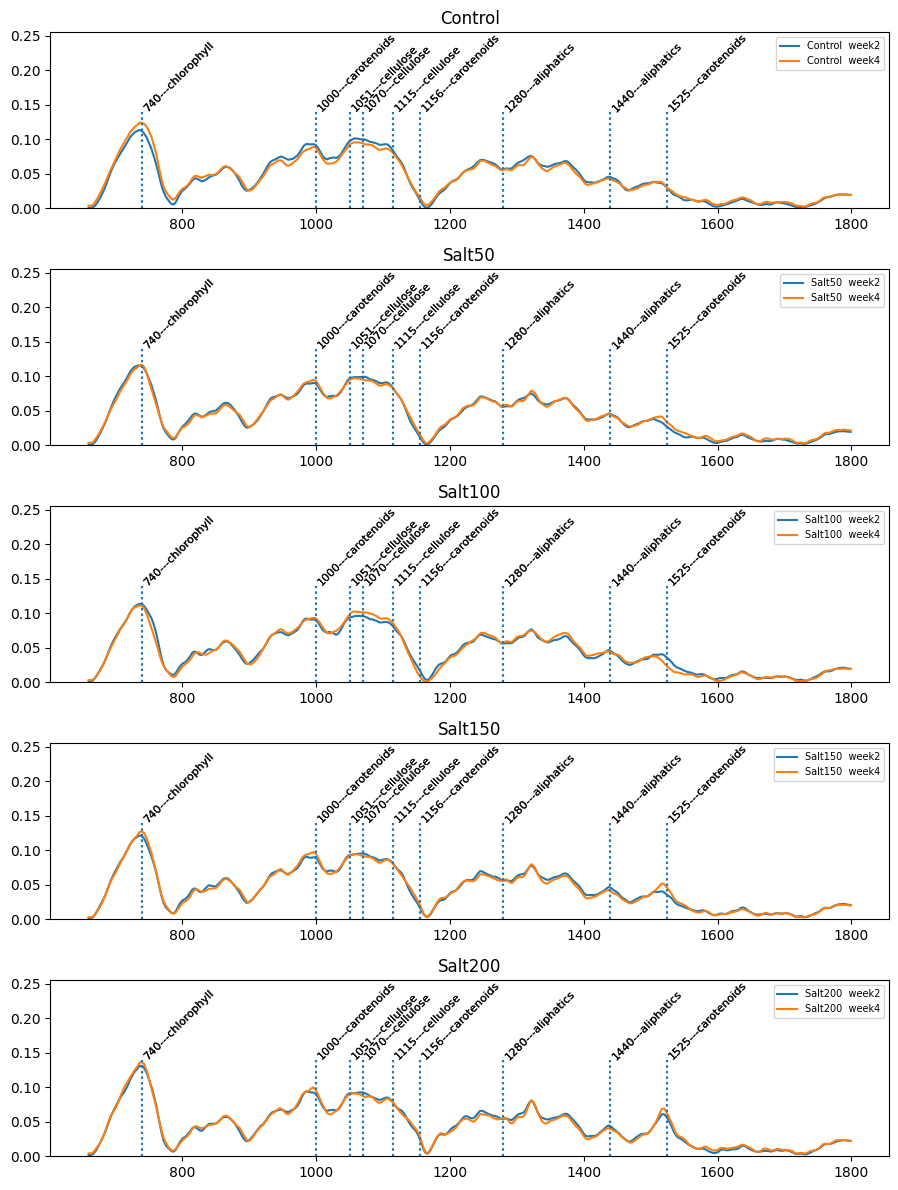

In [205]:
fig, ax = plt.subplots(5, figsize = (9,12))

lit_ass = [(1000, "carotenoids"), (1156, "carotenoids"), (1525, "carotenoids"), (740, "chlorophyll"), (1280, "aliphatics"), 
           (1440, "aliphatics"), (1051, "cellulose"),
          (1070, "cellulose"), (1115, "cellulose")]




for i,group in enumerate(df_data["group"].unique()):
    for week in df_data["week"].unique():
        print(group, week)
        y = df_data[(df_data["week"] == week) & (df_data["group"] == group)]["spectra"].to_numpy()[0]
        ax[i].plot(new_spectral_axis, y, label = f"{group}  {week}")
        #y_rp = rp.Spectrum(y, new_spectral_axis)
        #rp.plot.peaks(y_rp, ax = ax[i], label = week)
        for ass in lit_ass:
            ax[i].vlines(ass[0],0,0.14, linestyles = "dotted")
            ax[i].text(ass[0],0.14, f"{ass[0]}---{ass[1]}", rotation = 45, fontsize = 8)
        ax[i].set_ylim([0,0.255])
        ax[i].legend(fontsize = 7, )
    ax[i].set_title(group)
fig.tight_layout()
#save_figure("/Users/talha/desktop/wheat_python_alaysis_files/salt_analysis_graphs/","spectra comp btwn weeks")

<h2> comparison of spectrums same week different groups

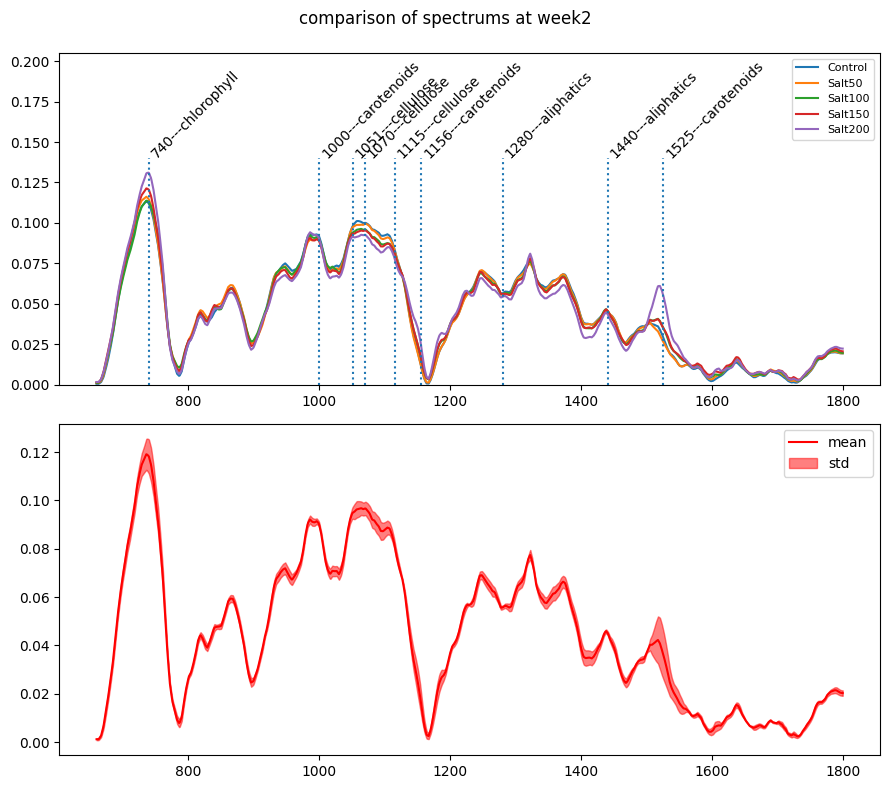

In [209]:
#week2 spectrum compqrisons
#change week variable to analyse different weeks data
week = "week2"

spect_list = list(total_spect_per_group[week].values())
mean = np.mean(spect_list, axis=0)
mean_rp = rp.Spectrum(mean,new_spectral_axis)
std = np.std(spect_list, axis=0)

fig, axis = plt.subplots(2,1, figsize = (9,8))
for group in total_spect_per_group[week]: 

    x = new_spectral_axis
    y = total_spect_per_group[week][group]
    x_p = total_peaks[week][group]
    y_p = y[x_p-660]
    axis[0].plot(x,y,label=group)


axis[1].plot(new_spectral_axis,mean, label = "mean", color = "red")
axis[1].fill_between(new_spectral_axis,mean+std,mean-std, alpha = 0.5, label = "std", color = "red")



for ass in lit_ass:
    axis[0].vlines(ass[0],0,0.14, linestyles = "dotted")
    axis[0].text(ass[0],0.14, f"{ass[0]}---{ass[1]}", rotation = 45)

axis[0].set_ylim([0,0.205])
axis[0].legend(fontsize = 8)
axis[1].legend()

fig.suptitle(f"comparison of spectrums at {week}")
fig.tight_layout()
#save_figure("/Users/talha/desktop/wheat_python_alaysis_files/salt_analysis_graphs/",f"spectra_comparison_{week}")
plt.show()



Control
914
Salt50
876
Salt100
894
Salt150
919
Salt200
969


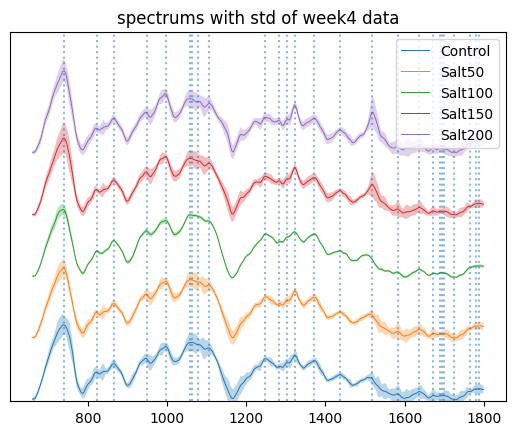

In [210]:
#comparison of spectrums of week4 different groups (shifted in y axis)
#change variable week to analyse different weeks data

week = "week4"

#grupların std plotu
#dotted line da ekle


spect_list = list(total_spect_per_group[week].values())

mean = np.mean(spect_list, axis=0)

peaks = find_peaks(mean)[0] + 660

for i,group in enumerate(spectrums[week]):
    print(group)
    mean_group = np.mean(spectrums[week][group], axis=0) #change to spectrums_2 for week4 data
    std_group = np.std(spectrums[week][group], axis=0)
    print(len(spectrums[week][group]))
    plt.plot(new_spectral_axis, mean_group + i/10, linewidth = 0.7, label = group)
    plt.fill_between(new_spectral_axis,mean_group-std_group + i/10,mean_group+std_group + i/10, alpha = 0.3)

for peak in peaks:
    plt.vlines(peak, 0,0.60, linestyles = "dotted", alpha = 0.5)
    pass

plt.title(f"spectrums with std of {week} data")
plt.yticks([])
plt.legend()
plt.ylim([0,0.60])
#save_figure("/Users/talha/desktop/wheat_python_alaysis_files/dry_analysis_graphs/",f"std_groups_{week}")
plt.show()

<h1> violin plots

# violin plot of multiple week data

In [219]:
# find closest peaks around a specified point
#modified version for different weeks added
i = 0
def closest_peak_all(peaks_, point): # peaks_ is a pd df thats keys is groups
    closest = []
    for group in peaks_["group"].unique():
        for week in peaks_["week"].unique():  
            print(i)
            peak_arr = np.array(df_peaks[(df_peaks["group"] == group) & (df_peaks["week"] == week)]["peaks"])[0]
            closest.append([group, week, 
                            int(peak_arr[np.abs(peak_arr - point).argmin()])])
    #print(f"closest peak to {point} is {closest}")
    #skip sorting for now
    # sorted_df = dict(sorted(closest.items(), key=lambda item: item[1]))
    closest_df = pd.DataFrame(closest, columns = ["group", "week", "peak"])
    return closest_df

    

In [221]:
df_spectrums

,group,week,wavenumber_1,wavenumber_2,wavenumber_3,wavenumber_4,wavenumber_5,wavenumber_6,wavenumber_7,wavenumber_8,...,wavenumber_1131,wavenumber_1132,wavenumber_1133,wavenumber_1134,wavenumber_1135,wavenumber_1136,wavenumber_1137,wavenumber_1138,wavenumber_1139,wavenumber_1140
0,Control,week2,"[0.028431018876942687, 0.0006114368161985593, ...","[0.028431018876942687, 0.0006114368161985593, ...","[0.028431018876942687, 0.0006114368161985593, ...","[0.029317456232136514, 0.0006114368161985593, ...","[0.030282767830093524, 0.0010135509534007102, ...","[0.031248079428050538, 0.0015806398964665945, ...","[0.03204158190043926, 0.002147728839532479, 0....","[0.03231530624743338, 0.0027490389176875163, 0...",...,"[0.05348415091971127, 0.020058885803126526, 0....","[0.05513564030806747, 0.019958873331917145, 0....","[0.052658602515623855, 0.019858860860707764, 0...","[0.049470640484453224, 0.019604662011220204, 0...","[0.04632884215124858, 0.01926518936795198, 0.0...","[0.04520218224351528, 0.018925716724683756, 0....","[0.044075522335781984, 0.018699475075213925, 0...","[0.042807872114425875, 0.018499245616830303, 0...","[0.04095327497100513, 0.01829901615844668, 0.0...","[0.039098677827584374, 0.018295908211301497, 0..."
1,Control,week4,"[0.10994222099815552, 0.0027940976520140436, 0...","[0.10994222099815552, 0.0027940976520140436, 0...","[0.10994222099815552, 0.0027940976520140436, 0...","[0.10960238954058311, 0.0027940976520140436, 0...","[0.10911734977600869, 0.0031622038071093535, 0...","[0.10863231001143425, 0.003641606445624994, 0....","[0.1080472938467608, 0.004121009084140634, 0.0...","[0.10431223797198144, 0.004701813866156491, 0....",...,"[0.02267501417180323, 0.01742882906572731, 0.0...","[0.02343835708878492, 0.01761115249518491, 0.0...","[0.021790350887480905, 0.01779347592464251, 0....","[0.01875887967063153, 0.017850599145800315, 0....","[0.015727408453782152, 0.01785473972642872, 0....","[0.017788447604219285, 0.01785888030705713, 0....","[0.021085199021783796, 0.017838572231550907, 0...","[0.024381950439348304, 0.017814673670988972, 0...","[0.02154986695640883, 0.017791808405350072, 0....","[0.018567198390835912, 0.017791808405350072, 0..."
2,Salt50,week2,"[0.0031087534679806682, 0.0006736279727688169,...","[0.0031087534679806682, 0.0006736279727688169,...","[0.0031087534679806682, 0.0006736279727688169,...","[0.0028214024799777405, 0.0006736279727688169,...","[0.00248992976564562, 0.0010051704906675846, 0...","[0.0021584570513134994, 0.0014733486164370722,...","[0.0020472069871014602, 0.0019415267422065595,...","[0.0028334587373131065, 0.0024363256000876255,...",...,"[0.015080578342906966, 0.019120542435274862, 0...","[0.013869350011211118, 0.01893555342702189, 0....","[0.013386568109978597, 0.01875056441876892, 0....","[0.013083968582081723, 0.01859517093653092, 0....","[0.012781369054184848, 0.01845621194730563, 0....","[0.01515620362230477, 0.01831725295808034, 0.0...","[0.017611014623985146, 0.018242236564886636, 0...","[0.019811130785451773, 0.01818199954029094, 0....","[0.02047591039457865, 0.01812176251569525, 0.0...","[0.021140690003705526, 0.018120771492973618, 0..."
3,Salt50,week4,"[0.011445212453653259, 0.0039020138546694335, ...","[0.011445212453653259, 0.0039020138546694335, ...","[0.011445212453653259, 0.0039020138546694335, ...","[0.01240670766731549, 0.0039020138546694335, 0...","[0.013788308788509182, 0.004214286460882922, 0...","[0.015169909909702874, 0.0046144725796966, 0.0...","[0.01660825867797854, 0.005014658698510277, 0....","[0.0201670967348499, 0.005511528439792638, 0.0...",...,"[0.041000402849390015, 0.019127171567390668, 0...","[0.04088853348196303, 0.019193525287401474, 0....","[0.03939281014770496, 0.01925987900741228, 0.0...","[0.03708690682816913, 0.019049453108169852, 0....","[0.034781003508633314, 0.018728770234897003, 0...","[0.03323805131247142, 0.01840808736162415, 0.0...","[0.03188579849804827, 0.01831336262496041, 0.0...","[0.030533545683625124, 0.018248166417693074, 0...","[

In [223]:
def remove_outliers_iqr(data):
    q1 = np.percentile(data, 10)
    q3 = np.percentile(data, 90)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [225]:
def violinplot_wn(df, wn, axes):
    # Example list of the wavenumbers you want to plot
    wavenumbers_to_plot = [f"wavenumber_{wn}"]
    
    df_copy = df.copy()
    
    
    for i in range(10):
        df.loc[i, f"wavenumber_{wn}"] = remove_outliers_iqr(df_copy[f"wavenumber_{wn}"][i])
    
    # Step 1 — Melt the DataFrame to long format, only keeping chosen columns
    df_long = df.melt(
        id_vars=['group', 'week'], 
        value_vars=wavenumbers_to_plot,  # only these wavenumbers
        var_name='wavenumber', 
        value_name='intensity_list'
    )
    
    # Step 2 — Expand the intensity arrays into separate rows
    df_expanded = df_long.explode('intensity_list').reset_index(drop=True)
    
    # Step 3 — Convert to float
    df_expanded['intensity_list'] = df_expanded['intensity_list'].astype(float)
    
    # Step 4 — Plot violin plot
    sns.violinplot(
        data=df_expanded,
        x='week',
        hue="group",
        y='intensity_list',
        ax = axes
        
    )



24
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]]
6 0
25
6 1
26
6 2
27
6 3
28
Figure saved as: violin_plots_comparison_between weeks
Figure saved as: violin_plots_comparison_between weeks


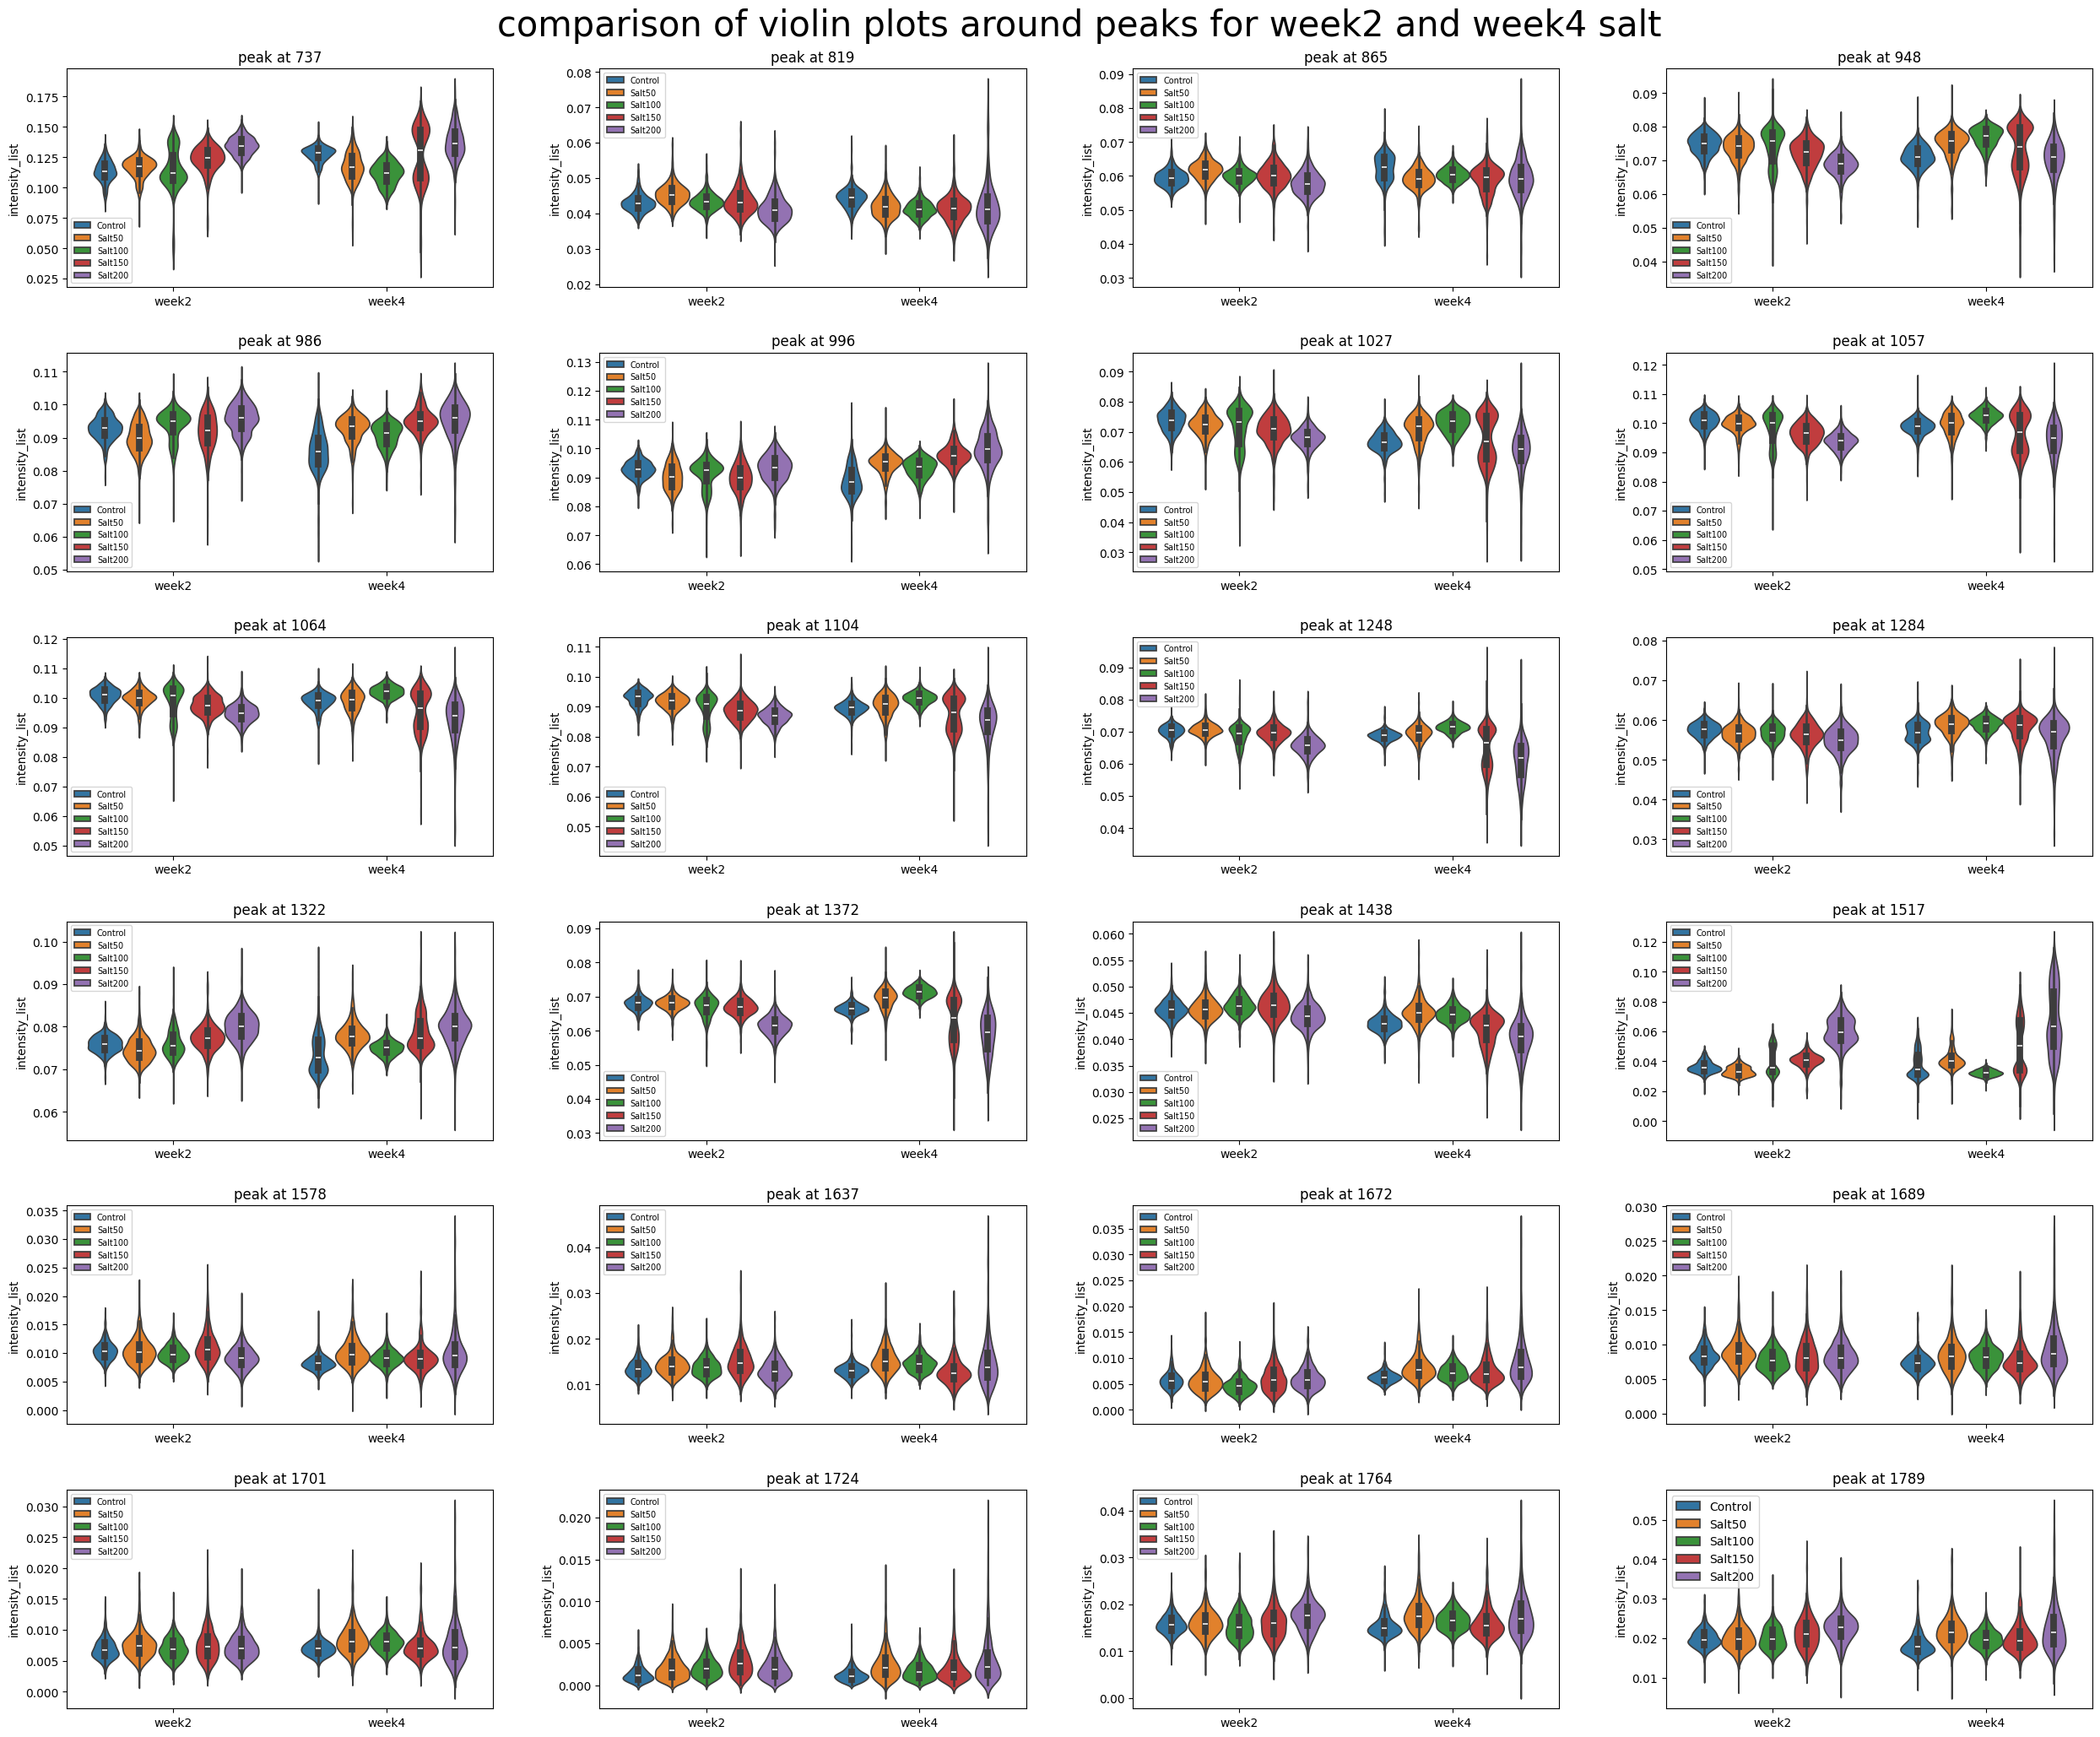

In [228]:
#minimas = find_peaks(-mean, prominence=0.005)[0]
mean_all = np.mean(df_data["spectra"], axis = 0)

peaks = find_peaks(mean_all)[0]
#extremums = np.sort(np.concatenate((minimas, peaks)))
#peak_indexes = ([int(np.where(extremums==peaks[i])[0][0]) for i in range(len(peaks))])

print(len(peaks))

"""print(extremums)
print(peak_indexes)"""

ncols= 4
nrows= len(peaks) // ncols + 1

cols = np.zeros(ncols)
rows = np.ones(nrows)

a = np.arange(ncols*nrows)  #dummy array a
a = a.reshape(nrows,ncols)
row, col = np.where(a==2)
row, col = row[0], col[0]

print(a)

fig,axes=plt.subplots(nrows,ncols, figsize = (24,24))

for i in range(len(peaks)):
    peak = peaks[i]
    
    row, col = np.where(a==i)
    row, col = row[0], col[0]



    


    violinplot_wn(df_spectrums, peak, axes[row, col])
    

    axes[row,col].set_title(f"peak at {peak + 660}")
    plt.xlabel("adfb")

    axes[row,col].legend(fontsize = 7)

    axes[row,col].set_xlabel("")




#del unnecessary axes
j = 0
for r in range(nrows):
    for c in range(ncols):
        j += 1
        if j > len(peaks):
            print(r,c)
            print(j)
            fig.delaxes(axes[r, c])


plt.legend()

fig.suptitle(f"comparison of violin plots around peaks for week2 and week4 {salt_or_dry}", fontsize = 30)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.95, wspace=0.25, hspace=0.3)


save_figure("/Users/talha/desktop/wheat_python_alaysis_files/salt_analysis_graphs/", "violin_plots_comparison_between weeks")
plt.show()


# violin plots around important peaks

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
4 1
10
Figure saved as: violin_plots_around_important_peaks_comparison_between weeks
Figure saved as: violin_plots_around_important_peaks_comparison_between weeks


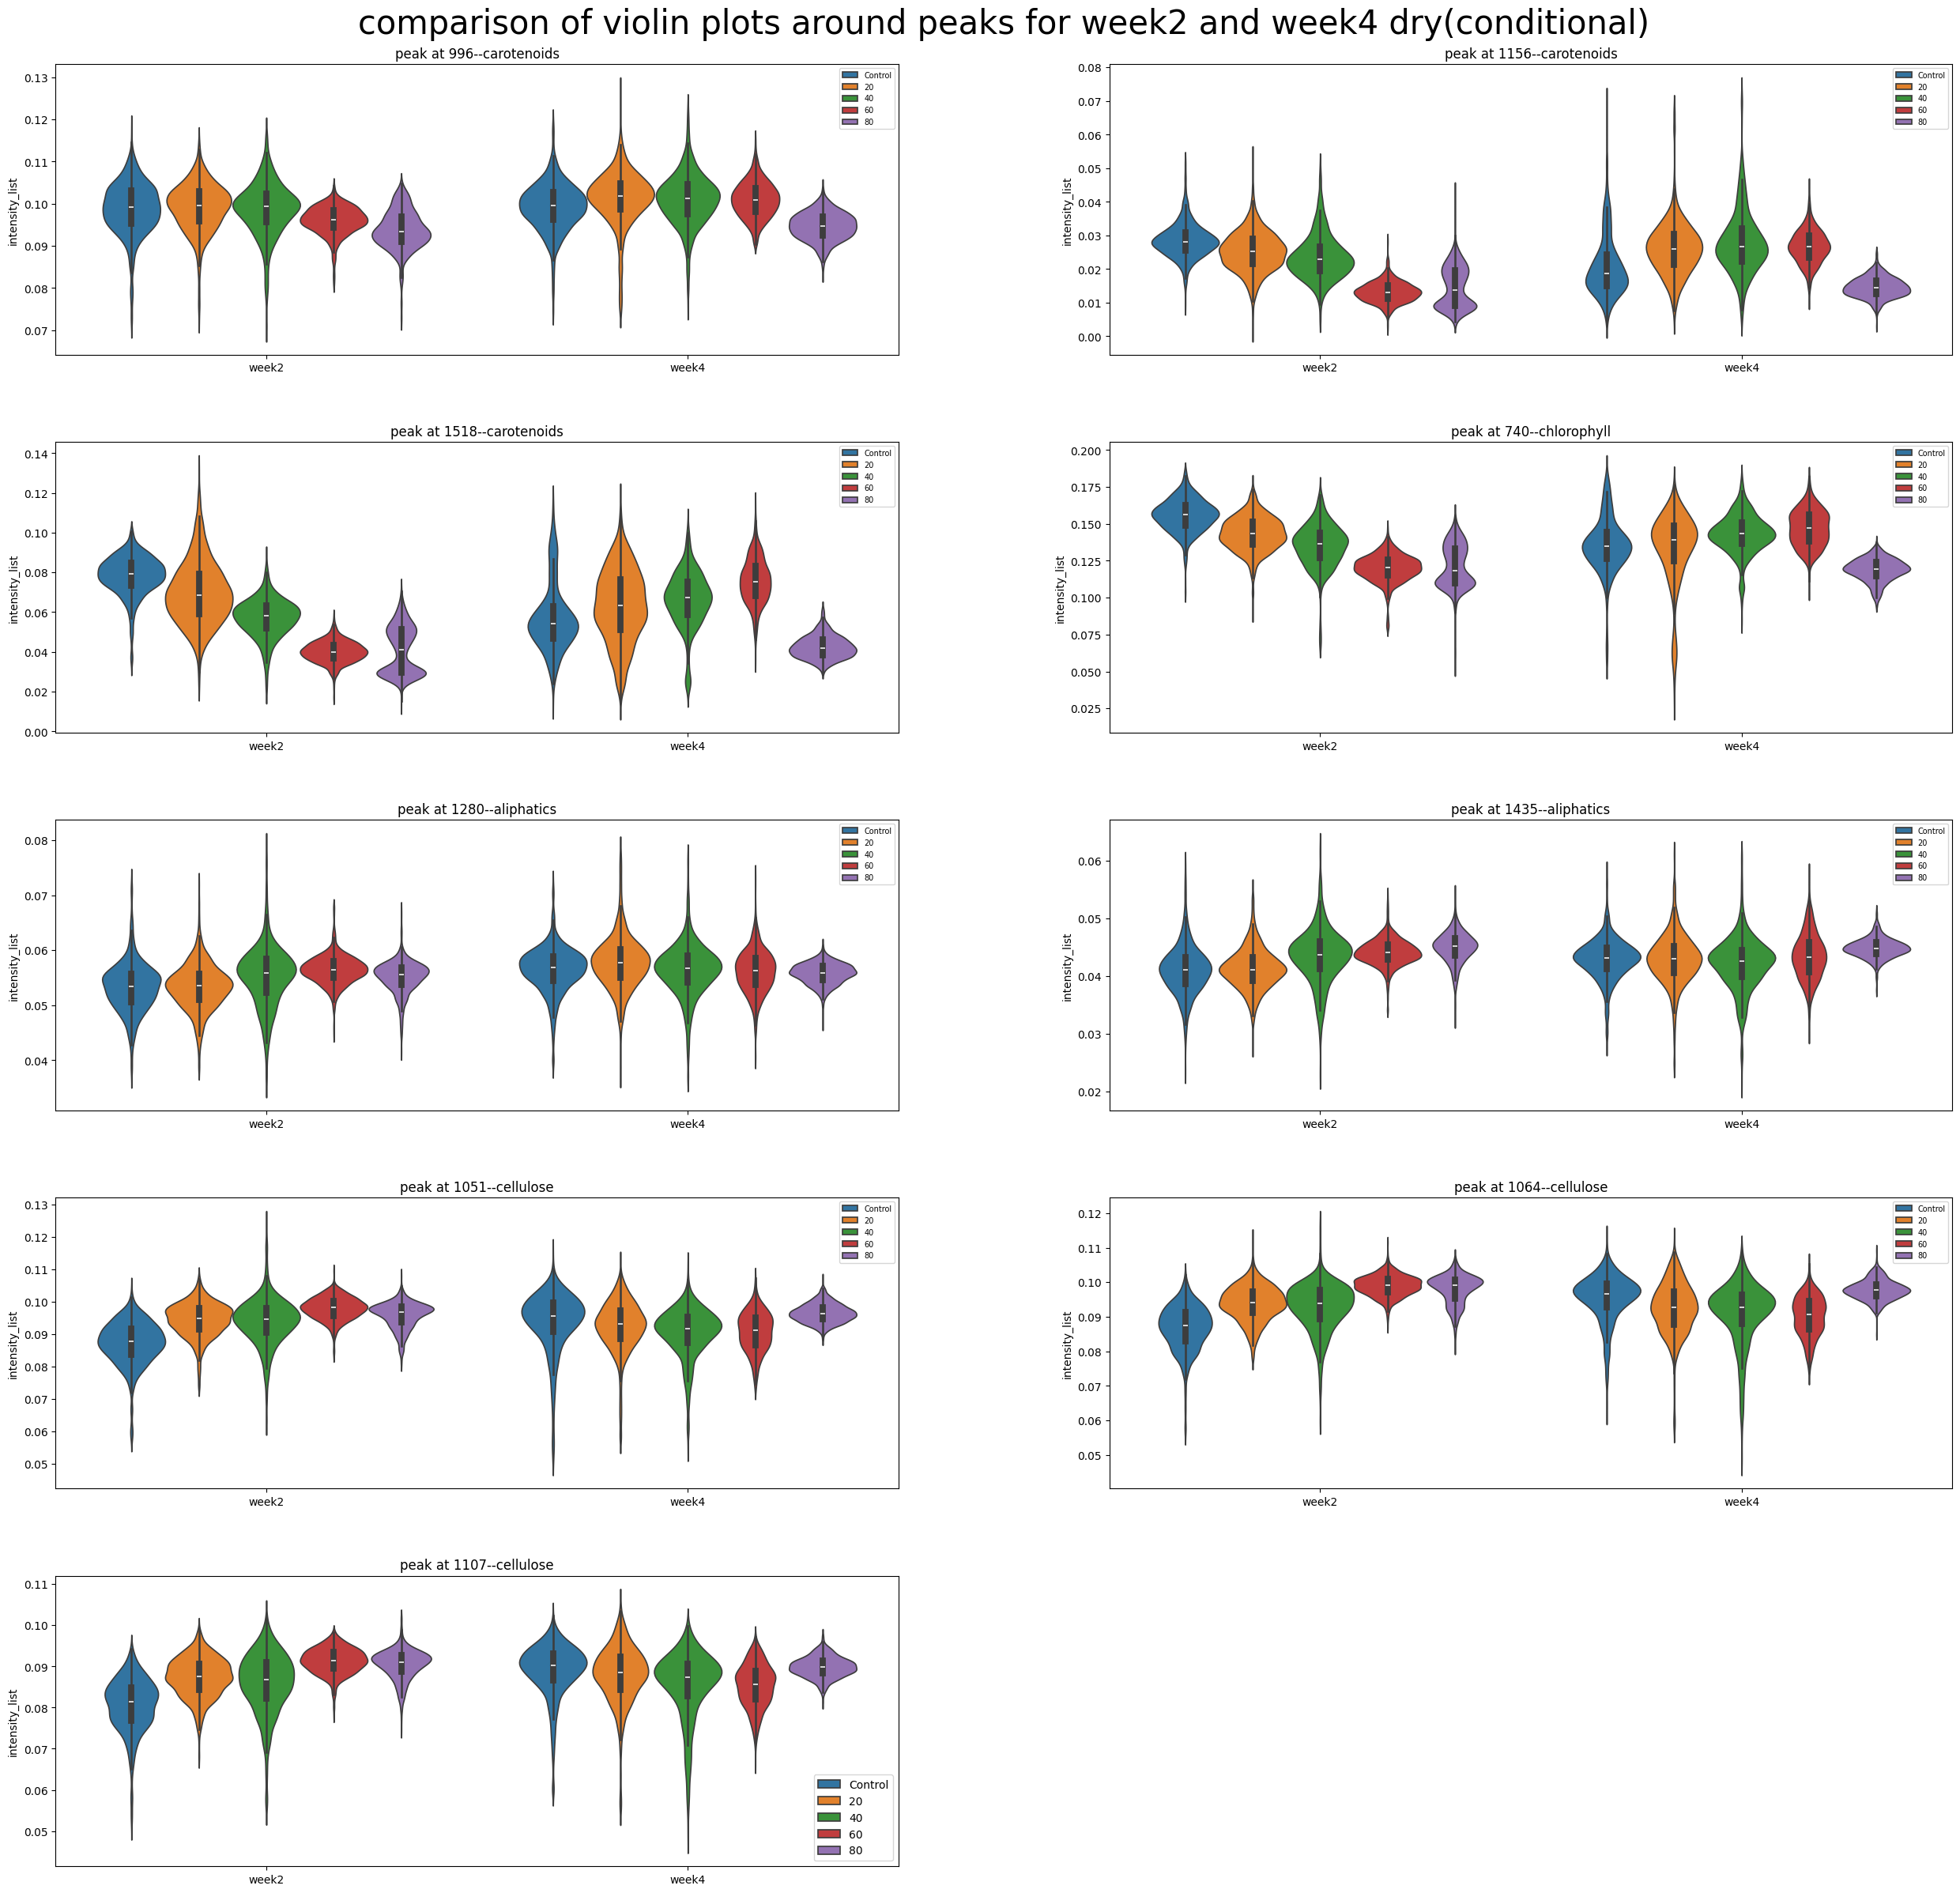

[ 740  819  864  948  996 1051 1057 1064 1107 1187 1223 1248 1267 1274
 1280 1322 1375 1413 1435 1518 1583 1610 1637 1672 1689 1701 1724 1761
 1781 1790]
[ 699  713  728  740  764  819  823  842  864  889  909  935  948  952
  984  996 1002 1051 1054 1069 1087 1107 1116 1138 1156 1189 1223 1228
 1248 1251 1259 1273 1285 1304 1322 1328 1354 1375 1383 1397 1414 1435
 1440 1452 1464 1490 1505 1518 1524 1532 1550 1568 1583 1588 1610 1612
 1626 1637 1643 1654 1672 1674 1690 1701 1704 1713 1728 1746 1761 1763
 1782 1797]
[(1000, 'carotenoids'), (1156, 'carotenoids'), (1525, 'carotenoids'), (740, 'chlorophyll'), (1280, 'aliphatics'), (1440, 'aliphatics'), (1051, 'cellulose'), (1070, 'cellulose'), (1115, 'cellulose')]


In [174]:
#minimas = find_peaks(-mean, prominence=0.005)[0]
mean_all = np.mean(df_data["spectra"], axis = 0)

peaks = find_peaks(mean_all)[0]
peaks_and_shoulders = find_peaks_and_shoulders(mean_all)[0]
#extremums = np.sort(np.concatenate((minimas, peaks)))
#peak_indexes = ([int(np.where(extremums==peaks[i])[0][0]) for i in range(len(peaks))])


"""print(extremums)
print(peak_indexes)"""

ncols= 2
nrows= 5

cols = np.zeros(ncols)
rows = np.ones(nrows)

a = np.arange(ncols*nrows)  #dummy array a
a = a.reshape(nrows,ncols)
"""row, col = np.where(a==2)
row, col = row[0], col[0]"""

print(a)

fig,axes=plt.subplots(nrows,ncols, figsize = (24,24))

for i in range(len(lit_ass)):
    peak_ = lit_ass[i][0] - 660
    #find closest peak of the mean spectrum to the peak assignment
    
    index_peak = np.abs(peaks-peak_).argmin()
    index_shoulder = np.abs(peaks_and_shoulders-peak_).argmin()


    if np.abs(peak_ - peaks[index_peak]) < 15:
        peak = peaks[index_peak]
    else:
        peak = peaks_and_shoulders[index_shoulder]

    
    row, col = np.where(a==i)
    row, col = row[0], col[0]



    

    violinplot_wn(df_spectrums, peak, axes[row,col])

    axes[row,col].set_title(f"peak at {peak + 660}--{lit_ass[i][1]}")

    axes[row,col].legend(fontsize = 7)

    axes[row,col].set_xlabel("")




#del unnecessary axes
j = 0
for r in range(nrows):
    for c in range(ncols):
        j += 1
        if j > len(lit_ass):
            print(r,c)
            print(j)
            fig.delaxes(axes[r, c])


plt.legend()

fig.suptitle(f"comparison of violin plots around peaks for week2 and week4 {salt_or_dry}(conditional)", fontsize = 30)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.95, wspace=0.25, hspace=0.3)


save_figure("/Users/talha/desktop/wheat_python_alaysis_files/dry_analysis_graphs/", "violin_plots_around_important_peaks_comparison_between weeks")
plt.show()
print(peaks+660)
print(peaks_and_shoulders+660)
print(lit_ass)

# Gaussian fit (still working on it. not complete)

In [95]:
from lmfit import Parameters, Minimizer
from lmfit.models import LorentzianModel,ConstantModel, GaussianModel

In [99]:
def find_peaks_and_shoulders(y, x = new_spectral_axis, p=(0.0005, 0.00005)): # y is an array
    dy = np.diff(y)
    dx = np.diff(x)
    d = dy/dx
    smoothed = savgol_filter(d, window_length=30, polyorder=9)
    shoulders = find_peaks(-smoothed, prominence = p[0])[0]

    peaks_ = find_peaks(y, prominence = p[0])[0]
    shoulders = find_peaks(-smoothed, prominence = p[1])[0]

    peaks_and_shoulders = np.sort(np.concatenate((peaks_,shoulders)))
    return (peaks_and_shoulders, d)

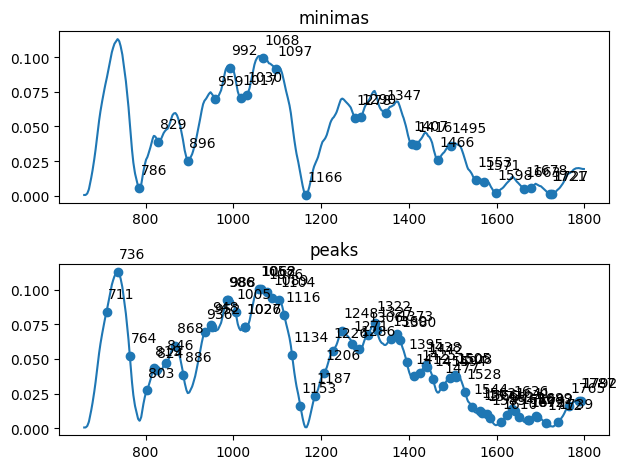

In [100]:
#for now, just focus on control
fig, ax = plt.subplots(2)
x=new_spectral_axis
y = total_spect_per_group["week2"]["control"]
ax[0].plot(new_spectral_axis, total_spect_per_group["week2"]["control"])
minimas, _ = find_peaks(-total_spect_per_group["week2"]["control"])
for minima in minimas:
    ax[0].text(new_spectral_axis[minima]+3, y[minima]+0.01, str(minima+660))

ax[0].scatter(new_spectral_axis[minimas], total_spect_per_group["week2"]["control"][minimas])
ax[0].set_title("minimas")
peaks = find_peaks_and_shoulders(y)[0]
ax[1].plot(x,y)
ax[1].scatter(x[peaks],y[peaks])
for peak in peaks:
    ax[1].text(new_spectral_axis[peak]+3, y[peak]+0.01, str(peak+660))

ax[1].set_title("peaks")
fig.tight_layout()
plt.show()

Figure saved as: spectrum to fit.png


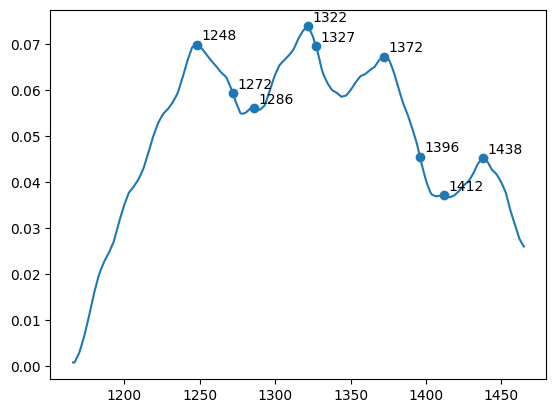

In [126]:
x = new_spectral_axis[1166-660:1466-660]
y = total_spect_per_group["week2"]["50"][1166-660:1466-660]

plt.plot(x,y)
peaks = find_peaks_and_shoulders(y, x=x, p=(0.000001,0.001))[0]
for peak in peaks:
    plt.text(x[peak]+3, y[peak]+0.001, str(peak+1166))
plt.scatter(x[peaks],y[peaks])

save_figure("spectrum to fit")

In [127]:
init_guesses = peaks + 1166
peaks

array([ 82, 106, 120, 156, 161, 206, 230, 246, 272])

In [128]:
#use a constant as the background
model=ConstantModel()
params=model.make_params()
params['c'].set(0.001,min=0, max=0.01)

ls = []
ps = []
for i in range(len(init_guesses)):
    #define parameters for each model
    guess_index = init_guesses[i]
    guess_amplitude = y[guess_index-1166]
    pref = "l" + str(i+1) + "_"
    #define model
    ls.append(GaussianModel(prefix = pref)) #lorentsians
    ps.append(ls[i].make_params()) # params
    ps[i][pref+"center"].set(guess_index, min = guess_index-10, max = guess_index+10)
    ps[i][pref+"amplitude"].set(guess_amplitude, min=0)


In [129]:
for l in ls:
    model = model + l

for p in ps:
    params.update(p)

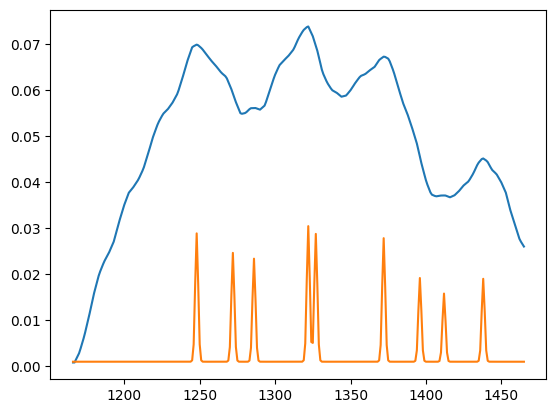

In [130]:
init = model.eval(params = params, x = x)
plt.plot(x,y)
plt.plot(x,init)

In [131]:
result = model.fit(data = y, params = params, x = x)
comps = result.eval_components()

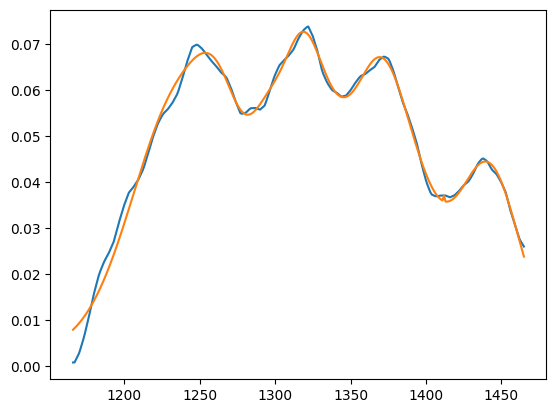

In [132]:
plt.plot(x,y)
plt.plot(x, result.best_fit)

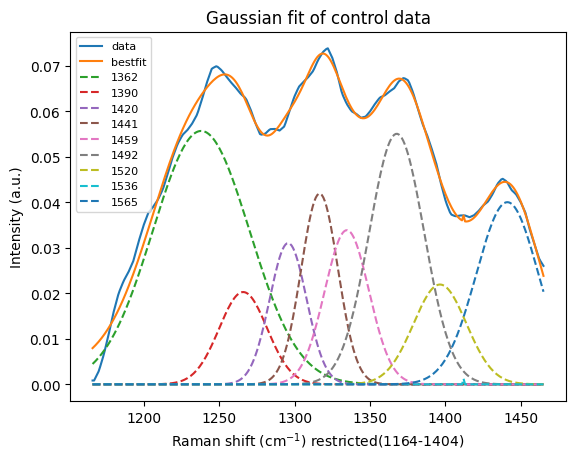

In [133]:
plt.plot(x,y, label="data")
plt.plot(x, result.best_fit, label = "bestfit")
for name, comp in comps.items():
    if name == "constant":
        #plt.plot(x, comp,'--')
        pass
        
        
    else:
        plt.plot(x,comp, '--', label=str(np.argmax(comp)+1290))
        
plt.legend(fontsize=8)
plt.xlabel(r'Raman shift (cm$^{-1}$) restricted(1164-1404)')
plt.ylabel(r'Intensity (a.u.)')
plt.title("Gaussian fit of control data")
#save_figure("gaussianfit")
plt.show()

# finding shoulders

In [31]:
from scipy.signal import savgol_filter

In [32]:
def find_peaks_and_shoulders(y, p=(0.0005, 0.00005)): # y is an array
    x = new_spectral_axis
    dy = np.diff(y)
    dx = np.diff(x)
    d = dy/dx
    smoothed = savgol_filter(d, window_length=30, polyorder=9)
    shoulders = find_peaks(-smoothed, prominence = p[0])[0]

    peaks_ = find_peaks(y, prominence = p[0])[0]
    shoulders = find_peaks(-smoothed, prominence = p[1])[0]

    peaks_and_shoulders = np.sort(np.concatenate((peaks_,shoulders)))
    return (peaks_and_shoulders, d)

Figure saved as: spectrum and shoulders for week4 salt
Figure saved as: spectrum and shoulders for week4 salt


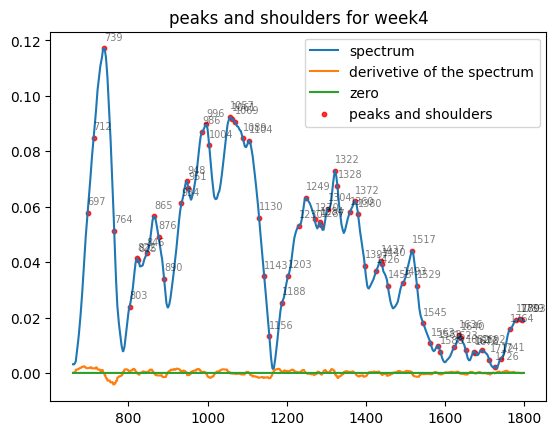

In [34]:
#visulasing peaks and shoulders

week = "week4"
x = new_spectral_axis
df = pd.DataFrame(total_spect_per_group[week]) 

spect_list = list(total_spect_per_group[week].values()) 

mean = np.mean(spect_list, axis=0)
peaks, d = find_peaks_and_shoulders(mean)

plt.plot(x, mean, label = "spectrum")
plt.plot(x[:-1],d, label = "derivetive of the spectrum")
plt.plot(x,np.zeros(len(x)), label = "zero")

for peak in peaks:
    plt.text(x[peak], mean[peak] + 0.003, str(x[peak]), fontsize = 7, alpha = 0.5)


"""plt.scatter(new_spectral_axis[shoulders+1],y[shoulders], s = 10, alpha= 0.8, c = "red")
plt.scatter(new_spectral_axis[peaks],y[peaks], s = 10, alpha= 0.8, c = "red")"""

plt.scatter(x[peaks],mean[peaks], s = 10, alpha= 0.8, c = "red", label = "peaks and shoulders", marker = "o")
plt.title(f"peaks and shoulders for {week}")
plt.legend()
#save_figure("/Users/talha/desktop/wheat_python_alaysis_files/salt_analysis_graphs/salt-shoulder",f"spectrum and shoulders for {week} salt")
